In [1]:
import numpy as np
from scipy import optimize as opt
from scipy.io import loadmat
from matplotlib import pyplot as plt
import time

In [2]:
data=loadmat('ex4data1.mat')
X=data['X']
Y=data['y']

In [3]:
m,n=X.shape

In [4]:
def Displaydata(X,m):
    _,axarr=plt.subplots(10,10,figsize=(10,10))
    for i in range(10):
        for j in range(10):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(20,20,order='F'))
            axarr[i,j].axis('off')


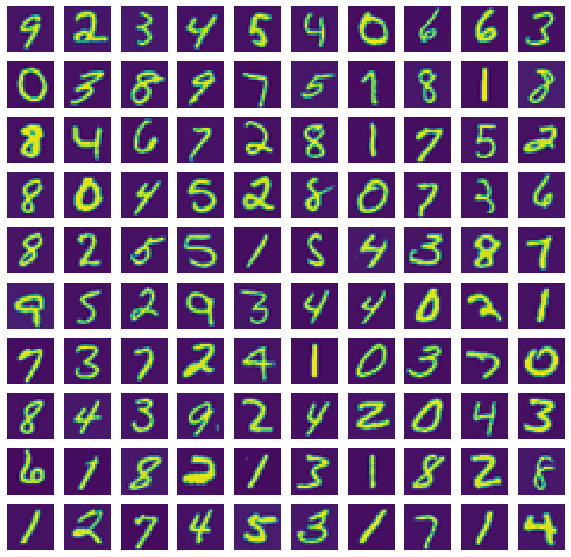

In [5]:
Displaydata(X,m)

In [6]:
input_layersize=400
hidden_layersize=25
num_labels=10

In [7]:
def sigmoid(z):
    temp=-z
    temp=np.exp(temp)
    temp=1+temp
    temp=1.0/temp
    return temp

In [8]:
def sigmoidGradient(z):
    temp=sigmoid(z)*(1-sigmoid(z))
    return temp

In [9]:
def nncostfunction(nnparam,input_layersize,hidden_layersize,num_labels,X,Y,lamda):
    nnparam=nnparam[:,np.newaxis]
    
    Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
    Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)
    ones=np.ones((X.shape[0],1))
    a1=np.hstack((ones,X))
    a2=sigmoid(a1@Theta1.T)
    predict=np.hstack((ones,a2))
    a3=sigmoid(predict@Theta2.T)
    y=np.zeros((X.shape[0],num_labels))
    for c in range(1,num_labels+1):
        y[:,c-1]=np.where(Y==c,1,0)
    J=0
    
    J=y*np.log(a3)+(1-y)*np.log(1-a3)
    J=np.sum(J)
    J=(-1/m)*J
    
    Theta1[:,0]=0
    Theta2[:,0]=0
    Theta1=Theta1**2
    Theta2=Theta2**2
    reg=np.sum(Theta1)
    reg=reg+np.sum(Theta2)
    J=J+(lamda/(2*m))*reg
    
    return J

In [10]:
def nnGradient(nnparam,input_layersize,hidden_layersize,num_labels,X,Y,lamda):
    nnparam=nnparam[:,np.newaxis]
    Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
    Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)
    delta1=np.zeros(Theta1.shape)
    delta2=np.zeros(Theta2.shape)
    
    ones=np.ones((m,1))
       
        
    z1=X
    a1=np.hstack((ones,z1))
        
        
    z2=a1@Theta1.T
    a2=sigmoid(z2)
    a2=np.hstack((ones,a2))
    z2=np.hstack((ones,z2))
        
        
        
    z3=a2@Theta2.T
    a3=sigmoid(z3)
        
        
        
    y=np.zeros((X.shape[0],num_labels))
    for c in range(1,num_labels+1):
        y[:,c-1]=np.where(Y==c,1,0)
        
    d3=a3-y
        
        
    d2=d3@Theta2*sigmoidGradient(z2)
        
    d2=d2[:,1:]
        
    delta2=delta2+d3.T@a2
        
    delta1=delta1+d2.T@a1
    
    
    delta1=delta1/m
    
    delta2=delta2/m
    
    Theta1[0,:]=0
    Theta2[0,:]=0
    delta1=delta1+(lamda/(m))*Theta1
    delta2=delta2+(lamda/m)*Theta2
    
    grad=unroll(delta1,delta2)
    
    return grad

In [11]:
def randomintialize(Lin,Lout):
    epi=(6**(1/2))/((Lin+Lout)**(1/2))
    W=np.random.rand(Lout,Lin+1)*(2*epi)-epi
    return W

In [12]:
theta=loadmat('ex4weights.mat')

In [13]:
Theta1=theta['Theta1']
Theta2=theta['Theta2']

In [14]:
def unroll(X1,X2):
    Theta1param=X1.reshape(X1.shape[0]*X1.shape[1],1)
    Theta2param=X2.reshape(X2.shape[0]*X2.shape[1],1)
    return np.vstack((Theta1param,Theta2param))

In [15]:
nnparam=unroll(Theta1,Theta2)

In [16]:
lamda=1
nncostfunction(nnparam,input_layersize,hidden_layersize,num_labels,X,Y.flatten(),lamda)

0.38376985909092365

In [17]:
lamda=0

nnGradient(nnparam,input_layersize,hidden_layersize,num_labels,X,Y.flatten(),lamda)

array([[-0.00451821],
       [ 0.        ],
       [ 0.        ],
       ...,
       [ 0.00611761],
       [ 0.00427495],
       [ 0.00282856]])

In [18]:
intial_theta1=randomintialize(400,25)
intial_theta2=randomintialize(25,10)
param=unroll(intial_theta1,intial_theta2)

In [19]:
start=time.perf_counter()
lamda=1
temp=opt.fmin_tnc(func=nncostfunction,fprime=nnGradient,x0=param,args=(input_layersize,hidden_layersize,num_labels,X,Y.flatten(),lamda))
end=time.perf_counter()
print(f"took{(start-end)/60.0} minutes")

took-0.15524642133333752 minutes


In [20]:
nn_param=temp[0]
Theta1=nnparam[0:(input_layersize+1)*hidden_layersize,:].reshape(hidden_layersize,input_layersize+1)
Theta2=nnparam[((input_layersize+1)*hidden_layersize):,:].reshape(num_labels,hidden_layersize+1)

In [21]:
ones=np.ones((X.shape[0],1))
X_new=np.hstack((ones,X))
a1=sigmoid(X_new@Theta1.T)
predict=np.hstack((ones,a1))
a2=sigmoid(predict@Theta2.T)
a2=np.argmax(a2,axis=1)+1
np.mean(a2[:,np.newaxis]==Y)*100

94.62

In [22]:
nncostfunction(nn_param,input_layersize,hidden_layersize,num_labels,X,Y.flatten(),lamda)

1.2693985507532668

In [23]:
f=open('outputTheta.txt','w')
for i in nn_param:
    f.write(str(i))
    f.write("\n")
f.close()